In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import sleep
from random import randint

In [2]:
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")
# soup

In [5]:
artist = []
for a in soup.select(".artist"):
    artist.append(a.get_text())

In [6]:
title = []
for a in soup.select(".title"):
    title.append(a.get_text())

In [7]:
songs = pd.DataFrame({"title":title,
                       "artist":artist,
                      })

In [8]:
songs

,title,artist
0,Rich Men North of Richmond,Oliver Anthony Music
1,Margaritaville,Jimmy Buffett
2,Come Monday,Jimmy Buffett
3,I Remember Everything (feat. Kacey Musgraves),Zach Bryan
4,Paint The Town Red,Doja Cat
...,...,...
93,Everywhere,Fleetwood Mac
94,Walkin' On the Sun,Smash Mouth
95,One Particular Harbour,Jimmy Buffett
96,Barbie World (with Aqua),Nicki Minaj & Ice Spice


In [9]:
songs.index = songs.index + 1
songs.index

RangeIndex(start=1, stop=99, step=1)

In [10]:
songs

,title,artist
1,Rich Men North of Richmond,Oliver Anthony Music
2,Margaritaville,Jimmy Buffett
3,Come Monday,Jimmy Buffett
4,I Remember Everything (feat. Kacey Musgraves),Zach Bryan
5,Paint The Town Red,Doja Cat
...,...,...
94,Everywhere,Fleetwood Mac
95,Walkin' On the Sun,Smash Mouth
96,One Particular Harbour,Jimmy Buffett
97,Barbie World (with Aqua),Nicki Minaj & Ice Spice


In [11]:
song_name = input("Please enter the name of a song: ")

if any(c.isalpha() for c in song_name) and any(c.isalnum() for c in song_name):
    print(f"You entered a valid song name: {song_name}")
else:
    print("Invalid input. Please enter a song name containing letters and/or numbers.")

Please enter the name of a song: december
You entered a valid song name: december


In [12]:
artist_name = input("Please enter the name of the artist: ")

if any(c.isalpha() for c in song_name) and any(c.isalnum() for c in artist_name):
    print(f"You entered a valid artist name: {artist_name}")
else:
    print("Invalid input. Please enter an artist name containing letters and/or numbers.")

Please enter the name of the artist: august
You entered a valid artist name: august


In [13]:
# Check if the input exists in our df
if song_name.lower() in songs['title'].str.lower().values:
    print(f"{song_name} exists in the data frame.")
else:
    print(f"{song_name} does not exist in the data frame.")

december does not exist in the data frame.


In [14]:
songs.to_csv('datasongs.csv', index=False)

## Song recommender - MVP

In [15]:
import pandas as pd

data = songs
df = pd.DataFrame(data)

song_name = input("Please enter the name of a song: ")

if any(c.isalpha() for c in song_name) and any(c.isalnum() for c in song_name):
    song_name = song_name.lower()

    matching_song = df[(df['title'].str.lower() == song_name)]

    if not matching_song.empty:
        print(f"The song '{matching_song['title'].values[0]}' by {matching_song['artist'].values[0]} matches your input.")

        recommended_song = df[df['title'].str.lower() != song_name].sample(1)
        print(f"Here's a recommended song: '{recommended_song['title'].values[0]}' by {recommended_song['artist'].values[0]}")
    else:
        print(f"No match found for the song: {song_name}")
else:
    print("Invalid input. Please enter a song name containing letters and/or numbers.")


Please enter the name of a song: maria
No match found for the song: maria


In [16]:
pd.set_option('display.max_rows', None)
songs

,title,artist
1,Rich Men North of Richmond,Oliver Anthony Music
2,Margaritaville,Jimmy Buffett
3,Come Monday,Jimmy Buffett
4,I Remember Everything (feat. Kacey Musgraves),Zach Bryan
5,Paint The Town Red,Doja Cat
6,Dream Weaver,Gary Wright
7,Lil Boo Thang,Paul Russell
8,Fast Car,Luke Combs
9,Angry,The Rolling Stones
10,Used To Be Young,Miley Cyrus


### Part 2 of Lab

In [17]:
url2 = "https://www.poplist.de/"

In [18]:
response = requests.get(url2)
response.status_code

200

In [19]:
soup2 = BeautifulSoup(response.content, "html.parser")
#soup2

In [20]:
iterations = range(1, 6)
#[i for i in iterations]
for i in iterations:
    page= str(i)
    url = "https://www.poplist.de/"+page
    print(url)

https://www.poplist.de/1
https://www.poplist.de/2
https://www.poplist.de/3
https://www.poplist.de/4
https://www.poplist.de/5


In [21]:
pages = []

for i in iterations:
    # assemble the url:
    start_at= str(i)
    url = "https://www.poplist.de/poplist.php?site="+start_at+"&var1=%20AND%20(tab_list_type.ID%20=%20466)&var4=Rolling%20Stone%20(2004)%20Die%20500%20besten%20Songs%20aller%20Zeiten%20-%20Kritiker&var5=Best-of-Lists%20from%20German%20Music%20Magazines%20-%20%20The%20500%20Best%20Songs%20of%20All%20Time&var10=Rolling%20Stone%20(2004)%20Die%20500%20besten%20Songs%20aller%20Zeiten,#list"
    # download html with a get request:
    response = requests.get(url)
    #response = requests.get(url, headers = {"Accept-Language": "en-US"})

    # monitor the process by printing the status code
    print("Status code: " + str(response.status_code))
    print(url)
    # store response into "pages" list
    pages.append(response)

    # respectful nap:
    wait_time = randint(1,4)
    print("I will sleep for " + str(wait_time) + " second/s.")
    sleep(wait_time)

Status code: 200
https://www.poplist.de/poplist.php?site=1&var1=%20AND%20(tab_list_type.ID%20=%20466)&var4=Rolling%20Stone%20(2004)%20Die%20500%20besten%20Songs%20aller%20Zeiten%20-%20Kritiker&var5=Best-of-Lists%20from%20German%20Music%20Magazines%20-%20%20The%20500%20Best%20Songs%20of%20All%20Time&var10=Rolling%20Stone%20(2004)%20Die%20500%20besten%20Songs%20aller%20Zeiten,#list
I will sleep for 3 second/s.
Status code: 200
https://www.poplist.de/poplist.php?site=2&var1=%20AND%20(tab_list_type.ID%20=%20466)&var4=Rolling%20Stone%20(2004)%20Die%20500%20besten%20Songs%20aller%20Zeiten%20-%20Kritiker&var5=Best-of-Lists%20from%20German%20Music%20Magazines%20-%20%20The%20500%20Best%20Songs%20of%20All%20Time&var10=Rolling%20Stone%20(2004)%20Die%20500%20besten%20Songs%20aller%20Zeiten,#list
I will sleep for 2 second/s.
Status code: 200
https://www.poplist.de/poplist.php?site=3&var1=%20AND%20(tab_list_type.ID%20=%20466)&var4=Rolling%20Stone%20(2004)%20Die%20500%20besten%20Songs%20aller%20Zeite

In [22]:
soup = BeautifulSoup(pages[0].content, "html.parser")

In [23]:
#soup

In [24]:
#Artist
#listcontainer > table > tbody > tr:nth-child(2) > td.bestlist.thick > a

#Song
#listcontainer > table > tbody > tr:nth-child(2) > td:nth-child(8) > a

In [25]:
soup.select("td.bestlist.thick > a")[1].get_text()

'The Rolling Stones'

In [26]:
soup.select("td.bestlist.thick > a")[0].get_text()

' Bob Dylan'

In [27]:
#print(BeautifulSoup(pages[0].content, "html.parser").prettify())

In [28]:
titles = []
iters = range(2,102)

for i in range (len(pages)):
    parsed = BeautifulSoup(pages[i].content, "html.parser")
    for j in soup.select("td:nth-child(8) > a"):
         titles.append(j.get_text())

In [29]:
len(titles)

500

In [30]:
artists = []
iters = range(2,102)

for i in range (len(pages)):
    parsed = BeautifulSoup(pages[i].content, "html.parser")
    for j in soup.select("td.bestlist.thick > a"):
         artists.append(j.get_text())

In [31]:
# artists

In [32]:
top500 = pd.DataFrame({"artists":artists,
                       "title":titles,
                      })

In [33]:
# top500

In [34]:
top500.index = top500.index + 1
top500.index

RangeIndex(start=1, stop=501, step=1)

In [35]:
# top500

## Song recommender with 2 lists, top 100 and top 500

In [36]:
song_name = input("Please enter the name of a song: ")

if any(c.isalpha() for c in song_name) and any(c.isalnum() for c in song_name):
    song_name = song_name.lower()

    matching_song = songs[(songs['title'].str.lower() == song_name)]

    if not matching_song.empty:
        print(f"The song '{matching_song['title'].values[0]}' by {matching_song['artist'].values[0]} matches your input.")

        recommended_song = songs[songs['title'].str.lower() != song_name].sample(1)
        print(f"Here's a recommended song: '{recommended_song['title'].values[0]}' by {recommended_song['artist'].values[0]}")
    else:
        other_song = other_song = top500.sample(1)
        print(f"Here's another song that might be interesting: '{other_song['title'].values[0]}' by {other_song['artists'].values[0]}")
else:
    print("Invalid input. Please enter a song name containing letters and/or numbers.")

Please enter the name of a song: silence
Here's another song that might be interesting: 'Subterranean Homesick Blues' by  Bob Dylan


## Song recommender - improved maybe

In [37]:
song_name = input("Please enter the name of a song: ")

if any(c.isalpha() for c in song_name) and any(c.isalnum() for c in song_name):
    song_name = song_name.lower()

    matching_song = songs[(songs['title'].str.lower() == song_name)]

    if not matching_song.empty:
        print(f"The song '{matching_song['title'].values[0]}' by {matching_song['artist'].values[0]} matches your input.")

        recommended_song = songs[songs['title'].str.lower() != song_name].sample(1)
        print(f"Here's a recommended song: '{recommended_song['title'].values[0]}' by {recommended_song['artist'].values[0]}")
    else:
        other_song = other_song = top500.sample(1)
        print(f"Here's another song that might be interesting: '{other_song['title'].values[0]}' by {other_song['artists'].values[0]}")

elif not matching_song2.empty:
        print(f"The song '{matching_song2['title'].values[0]}' by {matching_song2['artist'].values[0]} matches your input.")

        recommended_song2 = top2[top2['title'].str.lower() != song_name].sample(1)
        print(f"Here's a recommended song: '{recommended_song2['title'].values[0]}' by {recommended_song2['artists'].values[0]}")      
         
else:
    print("Invalid input. Please enter a song name containing letters and/or numbers.")

Please enter the name of a song: American
Here's another song that might be interesting: 'In My Life' by The Beatles


# Spotipy

In [38]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [39]:
secrets_file = open("secrets.txt","r")

In [40]:
string = secrets_file.read()

In [41]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [42]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [43]:
# Top 10000 id: 6sx8rpqIE3R9sfGSb8Udxy

In [44]:
# we will use our 'first paid music' playlist as an example:
playlist1 = sp.user_playlist_tracks("spotify", "6sx8rpqIE3R9sfGSb8Udxy")

In [45]:
playlist1["total"]

10000

In [46]:
playlist1.keys() 

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [47]:
playlist1['next']

'https://api.spotify.com/v1/playlists/6sx8rpqIE3R9sfGSb8Udxy/tracks?offset=100&limit=100&additional_types=track'

In [48]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist1_id):
    results = sp.user_playlist_tracks("spotify",playlist1_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

In [49]:
all_tracks = get_playlist_tracks("6sx8rpqIE3R9sfGSb8Udxy")
len(all_tracks)

10000

In [50]:
from pandas import json_normalize
tracks1 = json_normalize(all_tracks)

In [51]:
tracks1.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url
0,2018-12-04T20:49:14Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,4u7EnebtmKWzUH433cf5Qv,False,Bohemian Rhapsody - Remastered 2011,83,None,True,11,track,spotify:track:4u7EnebtmKWzUH433cf5Qv,None
1,2018-12-04T20:49:40Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,21cp8L9Pei4AgysZVihjSv,False,Child in Time,56,https://p.scdn.co/mp3-preview/dc92880be279b619...,True,5,track,spotify:track:21cp8L9Pei4AgysZVihjSv,None
2,2018-12-04T20:50:06Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,2g7gviEeJr6pyxO7G35EWQ,False,Paradise By the Dashboard Light,70,https://p.scdn.co/mp3-preview/4288d070a0b94c89...,True,6,track,spotify:track:2g7gviEeJr6pyxO7G35EWQ,None
3,2018-12-04T20:50:32Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,6L5BZEcZmD6RBJnimzlyKr,False,Nights In White Satin - Single Version / Mono,68,None,True,16,track,spotify:track:6L5BZEcZmD6RBJnimzlyKr,None
4,2018-12-04T20:51:00Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,3gE5067onHssnwibln70ef,False,Rain And Tears,0,None,True,5,track,spotify:track:3gE5067onHssnwibln70ef,None


In [52]:
def list_to_dict(x):
    return {i: x[i] for i in range(len(x))}
            
tracks1['artist_dict'] = tracks1['track.artists'].apply(list_to_dict)
tracks1.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url,artist_dict
0,2018-12-04T20:49:14Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Bohemian Rhapsody - Remastered 2011,83,None,True,11,track,spotify:track:4u7EnebtmKWzUH433cf5Qv,None,{0: {'external_urls': {'spotify': 'https://ope...
1,2018-12-04T20:49:40Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,False,Child in Time,56,https://p.scdn.co/mp3-preview/dc92880be279b619...,True,5,track,spotify:track:21cp8L9Pei4AgysZVihjSv,None,{0: {'external_urls': {'spotify': 'https://ope...
2,2018-12-04T20:50:06Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Paradise By the Dashboard Light,70,https://p.scdn.co/mp3-preview/4288d070a0b94c89...,True,6,track,spotify:track:2g7gviEeJr6pyxO7G35EWQ,None,{0: {'external_urls': {'spotify': 'https://ope...
3,2018-12-04T20:50:32Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Nights In White Satin - Single Version / Mono,68,None,True,16,track,spotify:track:6L5BZEcZmD6RBJnimzlyKr,None,{0: {'external_urls': {'spotify': 'https://ope...
4,2018-12-04T20:51:00Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,False,Rain And Tears,0,None,True,5,track,spotify:track:3gE5067onHssnwibln70ef,None,{0: {'external_urls': {'spotify': 'https://ope...


In [53]:
tracks1['artist_dict'] = tracks1['track.artists'].apply(list_to_dict)
tracks1.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url,artist_dict
0,2018-12-04T20:49:14Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Bohemian Rhapsody - Remastered 2011,83,None,True,11,track,spotify:track:4u7EnebtmKWzUH433cf5Qv,None,{0: {'external_urls': {'spotify': 'https://ope...
1,2018-12-04T20:49:40Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,False,Child in Time,56,https://p.scdn.co/mp3-preview/dc92880be279b619...,True,5,track,spotify:track:21cp8L9Pei4AgysZVihjSv,None,{0: {'external_urls': {'spotify': 'https://ope...
2,2018-12-04T20:50:06Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Paradise By the Dashboard Light,70,https://p.scdn.co/mp3-preview/4288d070a0b94c89...,True,6,track,spotify:track:2g7gviEeJr6pyxO7G35EWQ,None,{0: {'external_urls': {'spotify': 'https://ope...
3,2018-12-04T20:50:32Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Nights In White Satin - Single Version / Mono,68,None,True,16,track,spotify:track:6L5BZEcZmD6RBJnimzlyKr,None,{0: {'external_urls': {'spotify': 'https://ope...
4,2018-12-04T20:51:00Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,False,Rain And Tears,0,None,True,5,track,spotify:track:3gE5067onHssnwibln70ef,None,{0: {'external_urls': {'spotify': 'https://ope...


In [54]:
def expand_list_dict1(row):
    df = pd.DataFrame.from_dict(row['artist_dict'], orient='index')
    df['song_id'] = row['track.id']
    return df

tracks1['artists_dfs'] = tracks1.apply(expand_list_dict1, axis=1)
tracks1['artists_dfs'][2]

,external_urls,href,id,name,type,uri,song_id
0,{'spotify': 'https://open.spotify.com/artist/7...,https://api.spotify.com/v1/artists/7dnB1wSxbYa...,7dnB1wSxbYa8CejeVg98hz,Meat Loaf,artist,spotify:artist:7dnB1wSxbYa8CejeVg98hz,2g7gviEeJr6pyxO7G35EWQ


In [55]:
artist_df1 = pd.DataFrame(columns=['external_urls', 'href', 'id', 'name', 'type', 'uri'])
for val in tracks1['artists_dfs']:
    #display(val)
    artist_df1 = pd.concat([artist_df1, val], axis=0)
    
artist_df1.head()

,external_urls,href,id,name,type,uri,song_id
0,{'spotify': 'https://open.spotify.com/artist/1...,https://api.spotify.com/v1/artists/1dfeR4HaWDb...,1dfeR4HaWDbWqFHLkxsg1d,Queen,artist,spotify:artist:1dfeR4HaWDbWqFHLkxsg1d,4u7EnebtmKWzUH433cf5Qv
0,{'spotify': 'https://open.spotify.com/artist/5...,https://api.spotify.com/v1/artists/568ZhdwyaiC...,568ZhdwyaiCyOGJRtNYhWf,Deep Purple,artist,spotify:artist:568ZhdwyaiCyOGJRtNYhWf,21cp8L9Pei4AgysZVihjSv
0,{'spotify': 'https://open.spotify.com/artist/7...,https://api.spotify.com/v1/artists/7dnB1wSxbYa...,7dnB1wSxbYa8CejeVg98hz,Meat Loaf,artist,spotify:artist:7dnB1wSxbYa8CejeVg98hz,2g7gviEeJr6pyxO7G35EWQ
0,{'spotify': 'https://open.spotify.com/artist/5...,https://api.spotify.com/v1/artists/5BcZ22XONcR...,5BcZ22XONcRoLhTbZRuME1,The Moody Blues,artist,spotify:artist:5BcZ22XONcRoLhTbZRuME1,6L5BZEcZmD6RBJnimzlyKr
0,{'spotify': 'https://open.spotify.com/artist/2...,https://api.spotify.com/v1/artists/2XhhAWeUOlr...,2XhhAWeUOlrZnGOB7aKEI8,Aphrodite's Child,artist,spotify:artist:2XhhAWeUOlrZnGOB7aKEI8,3gE5067onHssnwibln70ef


In [56]:
df_merged1 = pd.merge(left=tracks1,
                    right=artist_df1,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged1.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,video_thumbnail.url,artist_dict,artists_dfs,external_urls,href,id,name,type,uri,song_id
0,2018-12-04T20:49:14Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,None,{0: {'external_urls': {'spotify': 'https://ope...,externa...,{'spotify': 'https://open.spotify.com/artist/1...,https://api.spotify.com/v1/artists/1dfeR4HaWDb...,1dfeR4HaWDbWqFHLkxsg1d,Queen,artist,spotify:artist:1dfeR4HaWDbWqFHLkxsg1d,4u7EnebtmKWzUH433cf5Qv
1,2018-12-04T20:49:40Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,None,{0: {'external_urls': {'spotify': 'https://ope...,externa...,{'spotify': 'https://open.spotify.com/artist/5...,https://api.spotify.com/v1/artists/568ZhdwyaiC...,568ZhdwyaiCyOGJRtNYhWf,Deep Purple,artist,spotify:artist:568ZhdwyaiCyOGJRtNYhWf,21cp8L9Pei4AgysZVihjSv
2,2018-12-04T20:50:06Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,None,{0: {'external_urls': {'spotify': 'https://ope...,externa...,{'spotify': 'https://open.spotify.com/artist/7...,https://api.spotify.com/v1/artists/7dnB1wSxbYa...,7dnB1wSxbYa8CejeVg98hz,Meat Loaf,artist,spotify:artist:7dnB1wSxbYa8CejeVg98hz,2g7gviEeJr6pyxO7G35EWQ
3,2018-12-04T20:50:32Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,album,[{'external_urls': {'spotify': 'https://open.s...,...,None,{0: {'external_urls': {'spotify': 'https://ope...,externa...,{'spotify': 'https://open.spotify.com/artist/5...,https://api.spotify.com/v1/artists/5BcZ22XONcR...,5BcZ22XONcRoLhTbZRuME1,The Moody Blues,artist,spotify:artist:5BcZ22XONcRoLhTbZRuME1,6L5BZEcZmD6RBJnimzlyKr
4,2018-12-04T20:51:00Z,False,None,https://open.spotify.com/user/q.c.m.olsthoorn,https://api.spotify.com/v1/users/q.c.m.olsthoorn,q.c.m.olsthoorn,user,spotify:user:q.c.m.olsthoorn,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,None,{0: {'external_urls': {'spotify': 'https://ope...,externa...,{'spotify': 'https://open.spotify.com/artist/2...,https://api.spotify.com/v1/artists/2XhhAWeUOlr...,2XhhAWeUOlrZnGOB7aKEI8,Aphrodite's Child,artist,spotify:artist:2XhhAWeUOlrZnGOB7aKEI8,3gE5067onHssnwibln70ef


In [95]:
df_final1 = df_merged1[['track.name', 'name', 'song_id']]
df_final1.head()

,track.name,name,song_id
0,Bohemian Rhapsody - Remastered 2011,Queen,4u7EnebtmKWzUH433cf5Qv
1,Child in Time,Deep Purple,21cp8L9Pei4AgysZVihjSv
2,Paradise By the Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ
3,Nights In White Satin - Single Version / Mono,The Moody Blues,6L5BZEcZmD6RBJnimzlyKr
4,Rain And Tears,Aphrodite's Child,3gE5067onHssnwibln70ef


In [96]:
chunks = [(i, i+100) for i in range(0, len(df_final1), 100)]
audio_features_list = []
for chunk in chunks:
    id_list100 = df_final1['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

10644

In [97]:
audio_features_df = json_normalize(audio_features_list)

In [98]:
df_w_audio_ft1 = pd.concat([df_final1, audio_features_df], axis=1)
df_w_audio_ft1.head()

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.271,...,0.3000,0.224,71.105,audio_features,4u7EnebtmKWzUH433cf5Qv,spotify:track:4u7EnebtmKWzUH433cf5Qv,https://api.spotify.com/v1/tracks/4u7EnebtmKWz...,https://api.spotify.com/v1/audio-analysis/4u7E...,354320,4
1,Child in Time,Deep Purple,21cp8L9Pei4AgysZVihjSv,0.331,0.340,9,-14.784,0,0.0369,0.313,...,0.2340,0.365,126.672,audio_features,21cp8L9Pei4AgysZVihjSv,spotify:track:21cp8L9Pei4AgysZVihjSv,https://api.spotify.com/v1/tracks/21cp8L9Pei4A...,https://api.spotify.com/v1/audio-analysis/21cp...,619267,4
2,Paradise By the Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ,0.326,0.872,2,-7.602,1,0.1220,0.214,...,0.4610,0.492,173.381,audio_features,2g7gviEeJr6pyxO7G35EWQ,spotify:track:2g7gviEeJr6pyxO7G35EWQ,https://api.spotify.com/v1/tracks/2g7gviEeJr6p...,https://api.spotify.com/v1/audio-analysis/2g7g...,508333,4
3,Nights In White Satin - Single Version / Mono,The Moody Blues,6L5BZEcZmD6RBJnimzlyKr,0.195,0.483,4,-4.991,0,0.0300,0.465,...,0.0686,0.173,84.710,audio_features,6L5BZEcZmD6RBJnimzlyKr,spotify:track:6L5BZEcZmD6RBJnimzlyKr,https://api.spotify.com/v1/tracks/6L5BZEcZmD6R...,https://api.spotify.com/v1/audio-analysis/6L5B...,269107,4
4,Rain And Tears,Aphrodite's Child,3gE5067onHssnwibln70ef,0.306,0.426,2,-10.943,0,0.0297,0.159,...,0.0867,0.326,73.220,audio_features,3gE5067onHssnwibln70ef,spotify:track:3gE5067onHssnwibln70ef,https://api.spotify.com/v1/tracks/3gE5067onHss...,https://api.spotify.com/v1/audio-analysis/3gE5...,191493,4


In [99]:
df_w_audio_ft1.to_csv('filewithaudio.csv', index=False)

In [72]:
import pandas as pd
df1 = pd.read_csv('filewithaudio.csv')

In [73]:
df1.head()

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.271,...,0.3000,0.224,71.105,audio_features,4u7EnebtmKWzUH433cf5Qv,spotify:track:4u7EnebtmKWzUH433cf5Qv,https://api.spotify.com/v1/tracks/4u7EnebtmKWz...,https://api.spotify.com/v1/audio-analysis/4u7E...,354320,4
1,Child in Time,Deep Purple,21cp8L9Pei4AgysZVihjSv,0.331,0.340,9,-14.784,0,0.0369,0.313,...,0.2340,0.365,126.672,audio_features,21cp8L9Pei4AgysZVihjSv,spotify:track:21cp8L9Pei4AgysZVihjSv,https://api.spotify.com/v1/tracks/21cp8L9Pei4A...,https://api.spotify.com/v1/audio-analysis/21cp...,619267,4
2,Paradise By the Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ,0.326,0.872,2,-7.602,1,0.1220,0.214,...,0.4610,0.492,173.381,audio_features,2g7gviEeJr6pyxO7G35EWQ,spotify:track:2g7gviEeJr6pyxO7G35EWQ,https://api.spotify.com/v1/tracks/2g7gviEeJr6p...,https://api.spotify.com/v1/audio-analysis/2g7g...,508333,4
3,Nights In White Satin - Single Version / Mono,The Moody Blues,6L5BZEcZmD6RBJnimzlyKr,0.195,0.483,4,-4.991,0,0.0300,0.465,...,0.0686,0.173,84.710,audio_features,6L5BZEcZmD6RBJnimzlyKr,spotify:track:6L5BZEcZmD6RBJnimzlyKr,https://api.spotify.com/v1/tracks/6L5BZEcZmD6R...,https://api.spotify.com/v1/audio-analysis/6L5B...,269107,4
4,Rain And Tears,Aphrodite's Child,3gE5067onHssnwibln70ef,0.306,0.426,2,-10.943,0,0.0297,0.159,...,0.0867,0.326,73.220,audio_features,3gE5067onHssnwibln70ef,spotify:track:3gE5067onHssnwibln70ef,https://api.spotify.com/v1/tracks/3gE5067onHss...,https://api.spotify.com/v1/audio-analysis/3gE5...,191493,4


In [74]:
df1.shape

(10644, 21)

In [75]:
sptracks = pd.read_csv('dataset 9.csv', index_col=0)
sptracks.shape

(114000, 20)

In [76]:
sptracks.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [77]:
df1.head()

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.271,...,0.3000,0.224,71.105,audio_features,4u7EnebtmKWzUH433cf5Qv,spotify:track:4u7EnebtmKWzUH433cf5Qv,https://api.spotify.com/v1/tracks/4u7EnebtmKWz...,https://api.spotify.com/v1/audio-analysis/4u7E...,354320,4
1,Child in Time,Deep Purple,21cp8L9Pei4AgysZVihjSv,0.331,0.340,9,-14.784,0,0.0369,0.313,...,0.2340,0.365,126.672,audio_features,21cp8L9Pei4AgysZVihjSv,spotify:track:21cp8L9Pei4AgysZVihjSv,https://api.spotify.com/v1/tracks/21cp8L9Pei4A...,https://api.spotify.com/v1/audio-analysis/21cp...,619267,4
2,Paradise By the Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ,0.326,0.872,2,-7.602,1,0.1220,0.214,...,0.4610,0.492,173.381,audio_features,2g7gviEeJr6pyxO7G35EWQ,spotify:track:2g7gviEeJr6pyxO7G35EWQ,https://api.spotify.com/v1/tracks/2g7gviEeJr6p...,https://api.spotify.com/v1/audio-analysis/2g7g...,508333,4
3,Nights In White Satin - Single Version / Mono,The Moody Blues,6L5BZEcZmD6RBJnimzlyKr,0.195,0.483,4,-4.991,0,0.0300,0.465,...,0.0686,0.173,84.710,audio_features,6L5BZEcZmD6RBJnimzlyKr,spotify:track:6L5BZEcZmD6RBJnimzlyKr,https://api.spotify.com/v1/tracks/6L5BZEcZmD6R...,https://api.spotify.com/v1/audio-analysis/6L5B...,269107,4
4,Rain And Tears,Aphrodite's Child,3gE5067onHssnwibln70ef,0.306,0.426,2,-10.943,0,0.0297,0.159,...,0.0867,0.326,73.220,audio_features,3gE5067onHssnwibln70ef,spotify:track:3gE5067onHssnwibln70ef,https://api.spotify.com/v1/tracks/3gE5067onHss...,https://api.spotify.com/v1/audio-analysis/3gE5...,191493,4


In [78]:
sptracks.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [79]:
df1.columns

Index(['track.name', 'name', 'song_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [80]:
sptracks = sptracks.drop(['popularity','track_genre','explicit','album_name'], axis=1)

In [81]:
sptracks.head()

,track_id,artists,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [82]:
df1 = df1.drop(['uri','track_href','analysis_url','id'], axis=1)

In [83]:
df1.head()

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.271,0.000,0.3000,0.224,71.105,audio_features,354320,4
1,Child in Time,Deep Purple,21cp8L9Pei4AgysZVihjSv,0.331,0.340,9,-14.784,0,0.0369,0.313,0.607,0.2340,0.365,126.672,audio_features,619267,4
2,Paradise By the Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ,0.326,0.872,2,-7.602,1,0.1220,0.214,0.000,0.4610,0.492,173.381,audio_features,508333,4
3,Nights In White Satin - Single Version / Mono,The Moody Blues,6L5BZEcZmD6RBJnimzlyKr,0.195,0.483,4,-4.991,0,0.0300,0.465,0.497,0.0686,0.173,84.710,audio_features,269107,4
4,Rain And Tears,Aphrodite's Child,3gE5067onHssnwibln70ef,0.306,0.426,2,-10.943,0,0.0297,0.159,0.000,0.0867,0.326,73.220,audio_features,191493,4


In [84]:
df1 = df1.rename(columns = {'track.name':'track_name','song_id':'track_id','name':'artists'})

In [85]:
df1.head()

,track_name,artists,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.271,0.000,0.3000,0.224,71.105,audio_features,354320,4
1,Child in Time,Deep Purple,21cp8L9Pei4AgysZVihjSv,0.331,0.340,9,-14.784,0,0.0369,0.313,0.607,0.2340,0.365,126.672,audio_features,619267,4
2,Paradise By the Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ,0.326,0.872,2,-7.602,1,0.1220,0.214,0.000,0.4610,0.492,173.381,audio_features,508333,4
3,Nights In White Satin - Single Version / Mono,The Moody Blues,6L5BZEcZmD6RBJnimzlyKr,0.195,0.483,4,-4.991,0,0.0300,0.465,0.497,0.0686,0.173,84.710,audio_features,269107,4
4,Rain And Tears,Aphrodite's Child,3gE5067onHssnwibln70ef,0.306,0.426,2,-10.943,0,0.0297,0.159,0.000,0.0867,0.326,73.220,audio_features,191493,4


In [86]:
sptracks.columns

Index(['track_id', 'artists', 'track_name', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [87]:
df1 = df1[['track_id', 'artists', 'track_name', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [88]:
X = pd.concat([df1, sptracks ], axis=0)

In [89]:
X.head()

,track_id,artists,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,4u7EnebtmKWzUH433cf5Qv,Queen,Bohemian Rhapsody - Remastered 2011,354320,0.414,0.404,0,-9.928,0,0.0499,0.271,0.000,0.3000,0.224,71.105,4
1,21cp8L9Pei4AgysZVihjSv,Deep Purple,Child in Time,619267,0.331,0.340,9,-14.784,0,0.0369,0.313,0.607,0.2340,0.365,126.672,4
2,2g7gviEeJr6pyxO7G35EWQ,Meat Loaf,Paradise By the Dashboard Light,508333,0.326,0.872,2,-7.602,1,0.1220,0.214,0.000,0.4610,0.492,173.381,4
3,6L5BZEcZmD6RBJnimzlyKr,The Moody Blues,Nights In White Satin - Single Version / Mono,269107,0.195,0.483,4,-4.991,0,0.0300,0.465,0.497,0.0686,0.173,84.710,4
4,3gE5067onHssnwibln70ef,Aphrodite's Child,Rain And Tears,191493,0.306,0.426,2,-10.943,0,0.0297,0.159,0.000,0.0867,0.326,73.220,4


In [90]:
X.isna().sum()

track_id            0
artists             1
track_name          1
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [91]:
X = X.dropna()

In [92]:
X.isna().sum()

track_id            0
artists             0
track_name          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [93]:
X_num = X._get_numeric_data()

In [94]:
X_num.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,354320,0.414,0.404,0,-9.928,0,0.0499,0.271,0.000,0.3000,0.224,71.105,4
1,619267,0.331,0.340,9,-14.784,0,0.0369,0.313,0.607,0.2340,0.365,126.672,4
2,508333,0.326,0.872,2,-7.602,1,0.1220,0.214,0.000,0.4610,0.492,173.381,4
3,269107,0.195,0.483,4,-4.991,0,0.0300,0.465,0.497,0.0686,0.173,84.710,4
4,191493,0.306,0.426,2,-10.943,0,0.0297,0.159,0.000,0.0867,0.326,73.220,4


In [95]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X_num)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X_num.columns).head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.220776,-0.889074,-0.932178,-1.489627,-0.309430,-1.362868,-0.310149,-0.151094,-0.485119,0.465188,-1.008893,-1.707097,0.224648
1,3.755100,-1.372502,-1.189477,1.040460,-1.293705,-1.362868,-0.437024,-0.023752,1.531510,0.114962,-0.471361,0.157929,0.224648
2,2.693972,-1.401624,0.949319,-0.927385,0.162033,0.733747,0.393522,-0.323916,-0.485119,1.319527,0.012799,1.725649,0.224648
3,0.405680,-2.164624,-0.614575,-0.365144,0.691262,-1.362868,-0.504366,0.437105,1.166058,-0.762725,-1.203320,-1.250464,0.224648
4,-0.336729,-1.518113,-0.843732,-0.927385,-0.515163,-1.362868,-0.507294,-0.490673,-0.485119,-0.666679,-0.620040,-1.636110,0.224648


In [96]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_prep)

/Users/heloisabal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=1234)

In [97]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    11762
1    23587
2    21805
3    26062
4    32763
5     7510
6     1154
dtype: int64

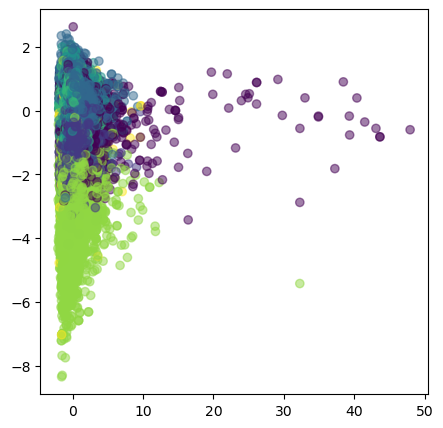

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 4], c=clusters,alpha=0.5)
plt.show()

In [99]:
kmeans.inertia_ 

1014279.034416016

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

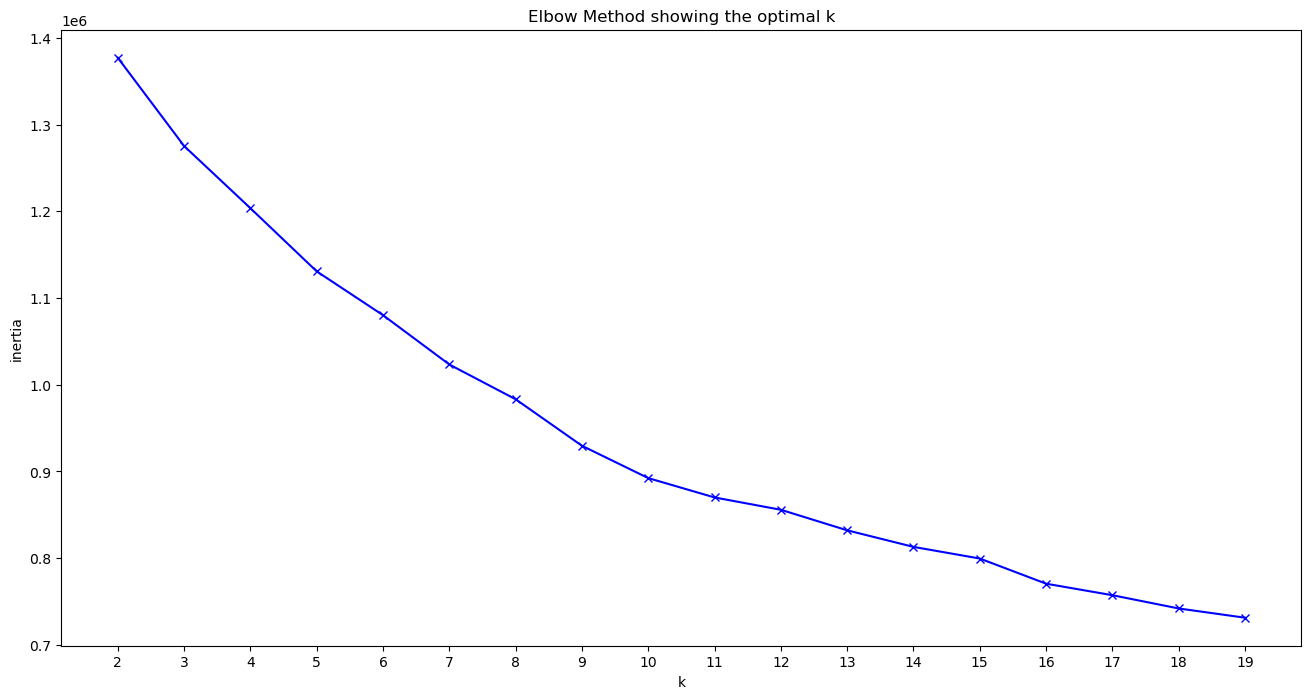

In [100]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init='auto', 
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [101]:
X_prep = pd.DataFrame(X_prep,columns=X_num.columns)

In [102]:
X_prep.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.220776,-0.889074,-0.932178,-1.489627,-0.309430,-1.362868,-0.310149,-0.151094,-0.485119,0.465188,-1.008893,-1.707097,0.224648
1,3.755100,-1.372502,-1.189477,1.040460,-1.293705,-1.362868,-0.437024,-0.023752,1.531510,0.114962,-0.471361,0.157929,0.224648
2,2.693972,-1.401624,0.949319,-0.927385,0.162033,0.733747,0.393522,-0.323916,-0.485119,1.319527,0.012799,1.725649,0.224648
3,0.405680,-2.164624,-0.614575,-0.365144,0.691262,-1.362868,-0.504366,0.437105,1.166058,-0.762725,-1.203320,-1.250464,0.224648
4,-0.336729,-1.518113,-0.843732,-0.927385,-0.515163,-1.362868,-0.507294,-0.490673,-0.485119,-0.666679,-0.620040,-1.636110,0.224648


In [103]:
X_prep['clusters'] = clusters

In [104]:
X_prep.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,clusters
0,1.220776,-0.889074,-0.932178,-1.489627,-0.309430,-1.362868,-0.310149,-0.151094,-0.485119,0.465188,-1.008893,-1.707097,0.224648,1
1,3.755100,-1.372502,-1.189477,1.040460,-1.293705,-1.362868,-0.437024,-0.023752,1.531510,0.114962,-0.471361,0.157929,0.224648,0
2,2.693972,-1.401624,0.949319,-0.927385,0.162033,0.733747,0.393522,-0.323916,-0.485119,1.319527,0.012799,1.725649,0.224648,2
3,0.405680,-2.164624,-0.614575,-0.365144,0.691262,-1.362868,-0.504366,0.437105,1.166058,-0.762725,-1.203320,-1.250464,0.224648,0
4,-0.336729,-1.518113,-0.843732,-0.927385,-0.515163,-1.362868,-0.507294,-0.490673,-0.485119,-0.666679,-0.620040,-1.636110,0.224648,1


In [105]:
X_cat = X.select_dtypes('object')

In [106]:
X_cat

,track_id,artists,track_name
0,4u7EnebtmKWzUH433cf5Qv,Queen,Bohemian Rhapsody - Remastered 2011
1,21cp8L9Pei4AgysZVihjSv,Deep Purple,Child in Time
2,2g7gviEeJr6pyxO7G35EWQ,Meat Loaf,Paradise By the Dashboard Light
3,6L5BZEcZmD6RBJnimzlyKr,The Moody Blues,Nights In White Satin - Single Version / Mono
4,3gE5067onHssnwibln70ef,Aphrodite's Child,Rain And Tears
...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,Sleep My Little Boy
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,Water Into Light
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Miss Perfumado
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Friends


In [108]:
X_cat = X_cat.reset_index(drop=True)

In [109]:
combined = pd.concat([X_prep, X_cat], axis=1)

In [110]:
combined.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,clusters,track_id,artists,track_name
0,1.220776,-0.889074,-0.932178,-1.489627,-0.309430,-1.362868,-0.310149,-0.151094,-0.485119,0.465188,-1.008893,-1.707097,0.224648,1,4u7EnebtmKWzUH433cf5Qv,Queen,Bohemian Rhapsody - Remastered 2011
1,3.755100,-1.372502,-1.189477,1.040460,-1.293705,-1.362868,-0.437024,-0.023752,1.531510,0.114962,-0.471361,0.157929,0.224648,0,21cp8L9Pei4AgysZVihjSv,Deep Purple,Child in Time
2,2.693972,-1.401624,0.949319,-0.927385,0.162033,0.733747,0.393522,-0.323916,-0.485119,1.319527,0.012799,1.725649,0.224648,2,2g7gviEeJr6pyxO7G35EWQ,Meat Loaf,Paradise By the Dashboard Light
3,0.405680,-2.164624,-0.614575,-0.365144,0.691262,-1.362868,-0.504366,0.437105,1.166058,-0.762725,-1.203320,-1.250464,0.224648,0,6L5BZEcZmD6RBJnimzlyKr,The Moody Blues,Nights In White Satin - Single Version / Mono
4,-0.336729,-1.518113,-0.843732,-0.927385,-0.515163,-1.362868,-0.507294,-0.490673,-0.485119,-0.666679,-0.620040,-1.636110,0.224648,1,3gE5067onHssnwibln70ef,Aphrodite's Child,Rain And Tears


In [111]:
song_clusters = combined[['artists','track_name','clusters']]
song_clusters

,artists,track_name,clusters
0,Queen,Bohemian Rhapsody - Remastered 2011,1
1,Deep Purple,Child in Time,0
2,Meat Loaf,Paradise By the Dashboard Light,2
3,The Moody Blues,Nights In White Satin - Single Version / Mono,0
4,Aphrodite's Child,Rain And Tears,1
...,...,...,...
124638,Rainy Lullaby,Sleep My Little Boy,5
124639,Rainy Lullaby,Water Into Light,5
124640,Cesária Evora,Miss Perfumado,1
124641,Michael W. Smith,Friends,1


In [112]:
song_clusters.to_csv('songclusters.csv')

In [42]:
#NOT RUNNING


# from sklearn.metrics import silhouette_score
# K = range(2, 15)
# silhouette = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     n_init='auto', 
#                     random_state=1234)
#     kmeans.fit(X_prep)
#     silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

# plt.figure(figsize=(16,8))
# plt.plot(K, silhouette, 'bx-')
# plt.xlabel('k')
# plt.ylabel('silhouette score')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Slhouette score showing the optimal k')

In [ ]:
# from tqdm.notebook import tqdm

# def get_playlist_tracks(playlist_id):
#     results = sp.user_playlist_tracks("spotify", playlist_id)
#     tracks = results['items']
#     count = 0  # Initialize count before the loop

#     pbar = tqdm()  # Initialize tqdm

#     while results['next'] is not None:
#         results = sp.next(results)
#         tracks = tracks + results['items']

#         sleep_time = randint(1, 3000) / 1000  # Calculate sleep time
#         sleep(sleep_time)  # respectful nap
#         count += 1  # Increment count

#         # Update tqdm progress bar
#         pbar.update(1)
#         pbar.set_postfix({'Sleep Time (seconds)': sleep_time, 'Current Count': count})

#     pbar.close()  # Close the progress bar

#     return tracks